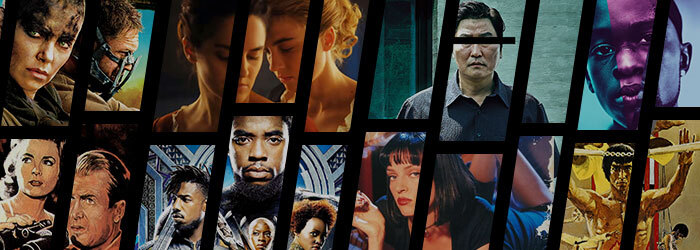

The movie industry is a mulit-billion dollar industry with many movies being made. In this notebook we are going to see what makes a movie the most money. Using genres, studios, year, and many other stuff from this [dataset](http://). 

This notebook features:
* Genre
* Year
* Lead studio
* Audience score

**Lets get started:**

# Setting up Notebook

Importing necessary libraries:

In [ ]:
import numpy as np
import pandas as pd 
import io
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.express as px
%matplotlib inline
import seaborn as sns
import pandas_profiling
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
print("Setup Complete")

# Loading data

In [ ]:
df = pd.read_csv('../input/hollywood-most-profitable-stories/HollywoodsMostProfitableStories.csv')
print(df)

In [ ]:
report = pandas_profiling.ProfileReport(df)
from IPython.display import display
display(report)

In [ ]:
print("There are {} films and {} columns in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} different years in this dataset {} \n".format(len(df.Year.unique()),
                                                                           ", ".join(df.Film.unique()[0:0])))

print("There are {} different genres in this dataset such as {} \n".format(len(df.Genre.unique()),
                                                                                      ", ".join(df.Genre.unique()[0:6])))

In [ ]:
pd.read_csv('../input/hollywood-most-profitable-stories/HollywoodsMostProfitableStories.csv')

In [ ]:
df.describe()

# Plot set of data

Shows different of movies like audience scores percent wise, how much many they make and etc.

* Line plots

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10, 6))

# Add title
plt.title("Hollywood Movies Numbers")

# Line chart showing daily global streams of each song 
sns.lineplot(data=df)

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Line chart showing Hollywood worldwide gross profits
sns.lineplot(data=df['Worldwide Gross'])

# Line chart showing Hollywood movies audience scores%
#sns.lineplot(data=df['Audience score %'])

# Line chart showing Hollywood movies profitability
sns.lineplot(data=df['Profitability'])

# Line chart showing Hollywood movies rotten tomatoe rating
sns.lineplot(data=df['Rotten Tomatoes %'])

# Add title
plt.title("Hollywood most profitable movies numbers")

# Movie Genres

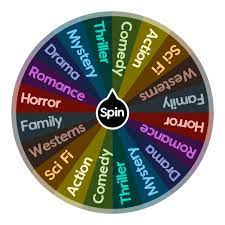

This graphs which genre makes the most money compare to others. Based on the graph, it seems like drama makes the most money then romance. With comedy and animation tied. It seems like fantasy and action makes the least.

* Style Text Boxes
* Bar Charts
* Word Cloud

In [ ]:
plt.text(0.9, 0.7, "Fantasy", size=35, rotation=0.5,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(0.5, 0.85, "Drama", size=50, rotation=15.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(0.30, 0.6, "Action", size=30, rotation=25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(1.5, 0.6, "Romance", size=45, rotation=10.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(1.4, 0.9, "Comedy", size=45, rotation=0.,
         ha="right", va="top",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(0.8, 0.4, "Animation", size=40, rotation=0.,
         ha="right", va="top",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.show()

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Which Genre Makes the Most Money?")

# Bar chart showing which genre made the most money
sns.barplot(x=df.Profitability, y=df['Genre'])

# Add label for vertical axis
plt.ylabel("Movie Genres")

Showing the number of movies made within each genre. From the most movies made based on genre to the least.

In [ ]:
genre = df.groupby("Genre")
genre.mean().sort_values(by="Profitability",ascending=False).head()

In [ ]:
plt.figure(figsize=(15,10))
genre.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Genre")
plt.ylabel("Number of Movies made Based on Genres")
plt.show()

Now we are going to see what movie genre people like the most. It seems like people like watching comedy and action the least favorite movie genre.

In [ ]:
fig = px.pie(df, values='Audience  score %', names='Genre')
fig.show()

In [ ]:
?WordCloud

This word cloud shows which genre has the most movies made from it. Since comedy is the biggest, that means people have made more comedy movies than any other genre.

In [ ]:
text = " ".join(review for review in df.Genre)
print ("There are {} words in the combination of all review.".format(len(text)))

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Creating a shape for my world cloud. Find an image that is black and white or it might not work. If you are having trouble.

In [ ]:
film_mask = np.array(Image.open("../input/film-image/film.png"))
film_mask

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
transformed_film_mask = np.ndarray((film_mask.shape[0],film_mask.shape[1]), np.int32)
for i in range(len(film_mask)):
    transformed_film_mask[i] = list(map(transform_format, film_mask[i]))
    
# Check the expected result of your mask
transformed_film_mask

Image might look weird because there are only 6 words. For it to look better, try doing an image word cloud that has more words in it.

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_film_mask,
                contour_width=3, contour_color='black')

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Lead Studios

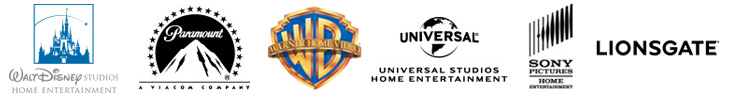

This graphs which Studio makes the most money compare to others.

* Bar Charts
* Pie Charts
* Scatter plot

In [ ]:
ls = df.groupby("Lead Studio")
ls.mean().sort_values(by="Profitability",ascending=False).head()

This shows Independent studio made the most movies while New Line studio made the least movies.

In [ ]:
plt.figure(figsize=(15,10))
ls.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Lead Studio")
plt.ylabel("Number of Movies made Based on Lead Studios")
plt.show()

This shows which studio makes made the most money on a film. Base on the chart it looks like Summit studio has made more money on worldwide gross and so did Independent studio. If you look at the profitability section, then you will see Indpendpent made the money profitability wise.

In [ ]:
sns.scatterplot(x=df['Profitability'], y=df['Worldwide Gross'], hue=df['Lead Studio'])

This shows which studio makes the most money. They added up the numbers of profitability fr each studio and Independent studio made the most money. This is because they also made the most movies, but Disney is the second studio to make the most money even though they are the third studio to make the most movies.

In [ ]:
fig = px.pie(df, values='Profitability', names='Lead Studio')
fig.show()

Now we are going to see what studio made the most movies with the most audience score. It seems like Independent made the most movies that people enjoyed.

In [ ]:
fig = px.pie(df, values='Audience  score %', names='Lead Studio')
fig.show()

# If you like this notebook, please an Upvote! Don't forget to check out my other notebooks too!

* [ConnectX Baseline](https://www.kaggle.com/brendan45774/connectx-baseline)
* [Data Visuals - Matplotlib](http://www.kaggle.com/brendan45774/data-visuals-matplotlib)
* [Digit Recognizer Solution](http://www.kaggle.com/brendan45774/digit-recognizer-solution)
* [Dictionary and Pandas Cheat sheet](https://www.kaggle.com/brendan45774/dictionary-and-pandas-cheat-sheet)
* [EDA Tutorial Hollywood Movies](https://www.kaggle.com/brendan45774/eda-tutorial-hollywood-movies)
* [Getting started with Matplotlib](http://www.kaggle.com/brendan45774/getting-started-with-matplotlib)
* [How to get the lowest score](https://www.kaggle.com/brendan45774/how-to-get-the-lowest-score)
* [House predict solution](http://www.kaggle.com/brendan45774/house-predict-solution)
* [Kuzushiji-MNIST Panda](http://www.kaggle.com/brendan45774/kuzushiji-mnist-panda)
* [Plotly Coronavirus (Covid-19)](https://www.kaggle.com/brendan45774/plotly-coronavirus-covid-19)
* [Titanic Top Solution](http://www.kaggle.com/brendan45774/titanic-top-solution)
* [Titanic Data Solution](http://www.kaggle.com/brendan45774/titanic-data-solution)
* [Word Cloud - Analyzing Names](https://www.kaggle.com/brendan45774/word-cloud-analyzing-names)